# 10 Academy: Artificial Intelligence Mastery
#### Week 8 and 9 Challenges  
#### Project: Improved detection of fraud cases for e-commerce and bank transactions
##### Data Analysis(EDA),Processing and Future Engineering
Ethel.C 


In [3]:
import sys
import pandas as pd
scripts_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\scripts'
src_dir = r'E:\DS+ML\AIM3\Week-8-9\Fraud_Detection_E_Commerce_Bank_Transaction\src'
# Load the datasets
fraud_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data.csv")
creditcard_data = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\creditcard.csv")
ip_to_country = pd.read_csv(r"E:\DS+ML\AIM3\Week-8-9\Data\IpAddress_to_Country.csv")
# output folder 
output_path = r"E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data_Merged.csv"
output_future_engineered = r"E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv"
# Add directories to the Python path if they are not already included
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)

## Data Processing

#### 1.Display first few rows for each dataset
#### 2.Display basic statistics for numerical columns 
#### 3.Check dataset shape (rows, columns)
#### 4.Check for Missing values, duplication and handling    
#### 5.Class distribution for target variables

In [2]:
from data_processing import process_data #Data Processing
from data_analysis_EDA import perform_eda # Data_Analysis_EDA
from feature_engineering import feature_engineering



In [3]:
print("Fraud Data Head:")
fraud_data.head()


Fraud Data Head:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
print("\nCredit Card Data Head:")
creditcard_data.head()



Credit Card Data Head:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("\nIP to Country Data Head:")
ip_to_country.head()


IP to Country Data Head:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
print("\nFraud Data Describe:")
fraud_data.describe()


Fraud Data Describe:


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:

print("\nCredit Card Data Describe:")
creditcard_data.describe()



Credit Card Data Describe:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Fraud Data Shape: (151112, 11)
Credit Card Data Shape: (284807, 31)
IP to Country Data Shape: (138846, 3)

Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284

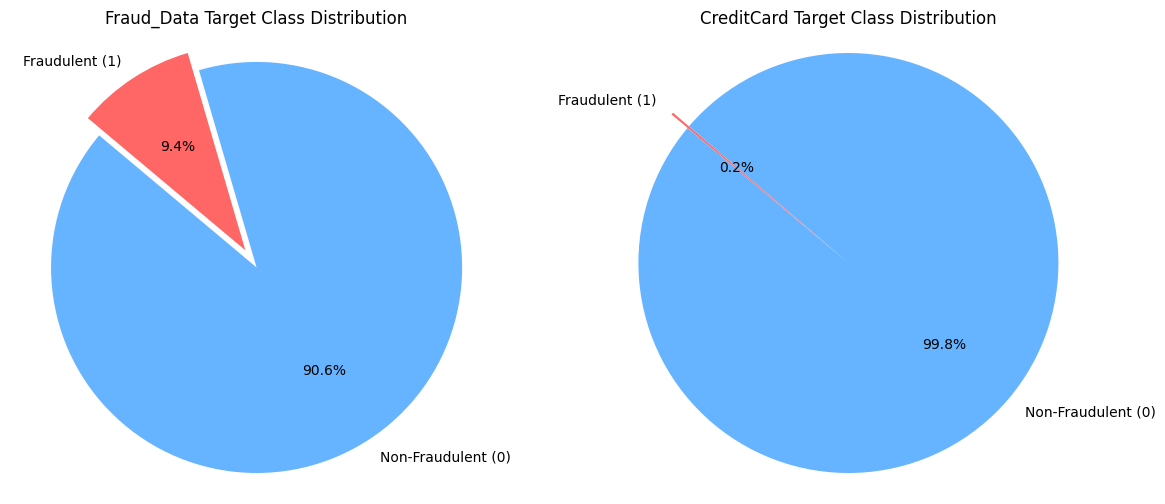

In [3]:
process_data(fraud_data, creditcard_data, ip_to_country)

## Explanatory Data Analysis(EDA)

#### 1. Univariate analysis
#### 2. Bivariate analysis
#### 3. Merge Datasets for Geolocation Analysis
#### 4. Correlation 


Starting exploratory data analysis (EDA)...

Plotting distributions for fraud_data...
Plotting 'purchase_value' histogram...
Plotting 'age' histogram...
Plotting 'source' bar chart...
Plotting 'browser' bar chart...


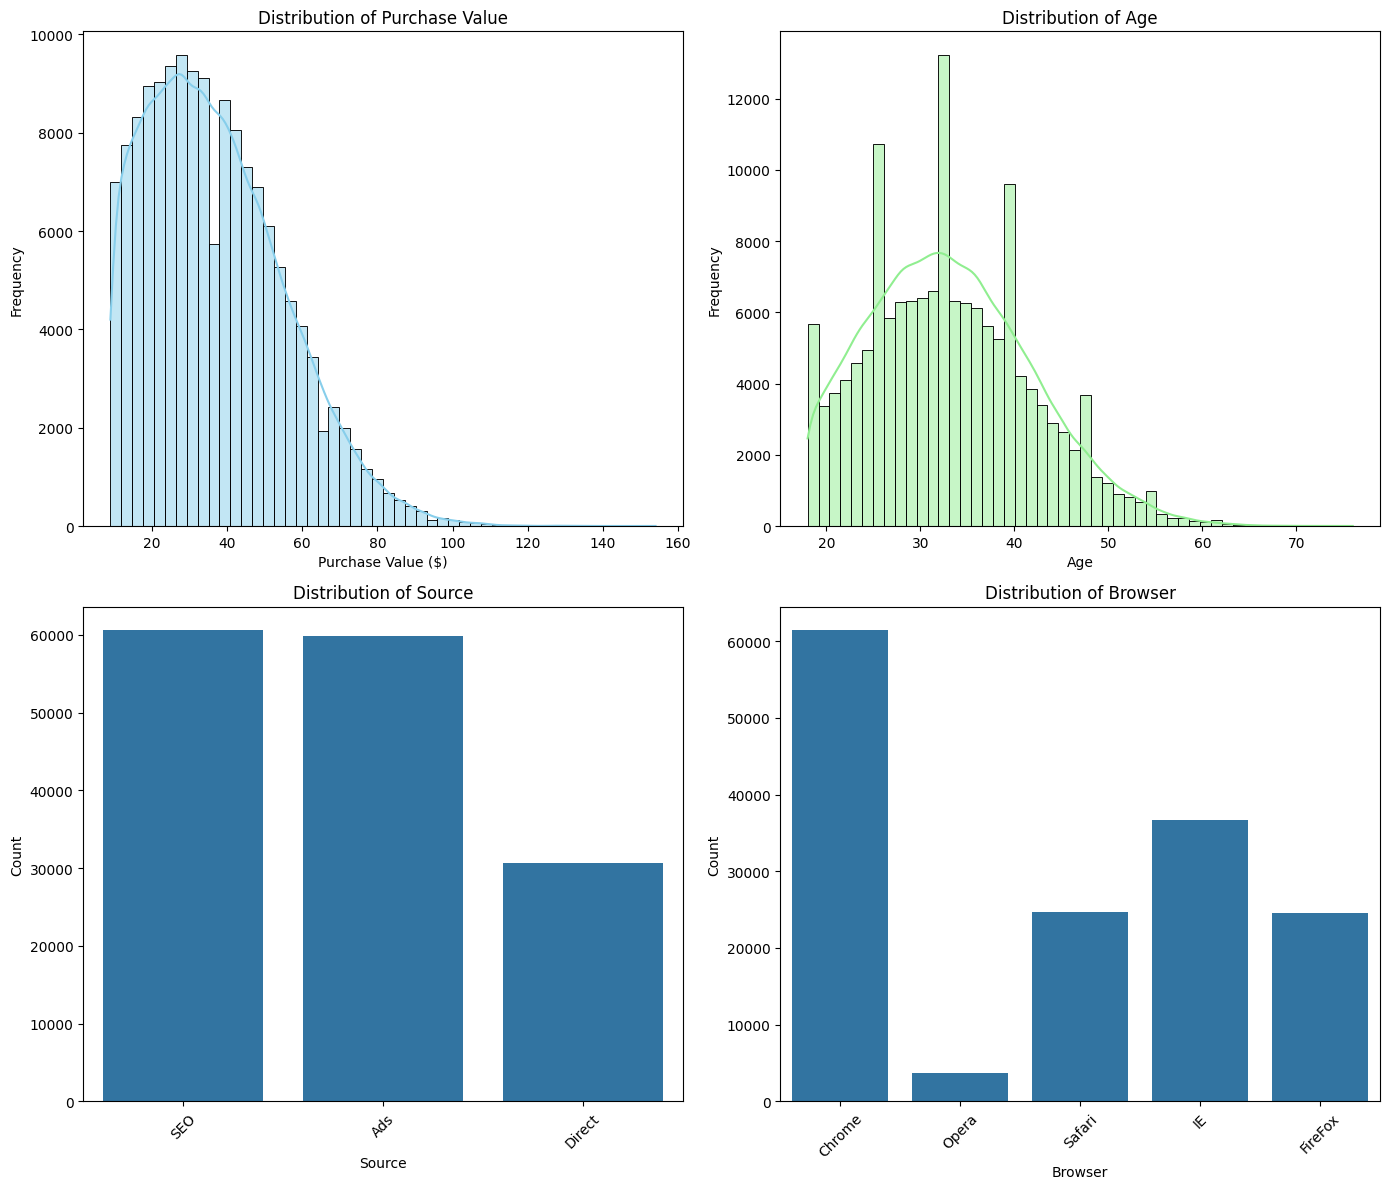

Successfully plotted fraud_data distributions.

Plotting distributions for creditcard_data...
Plotting 'Time' histogram...
Plotting 'Amount' histogram...
Plotting 'Class' bar chart...


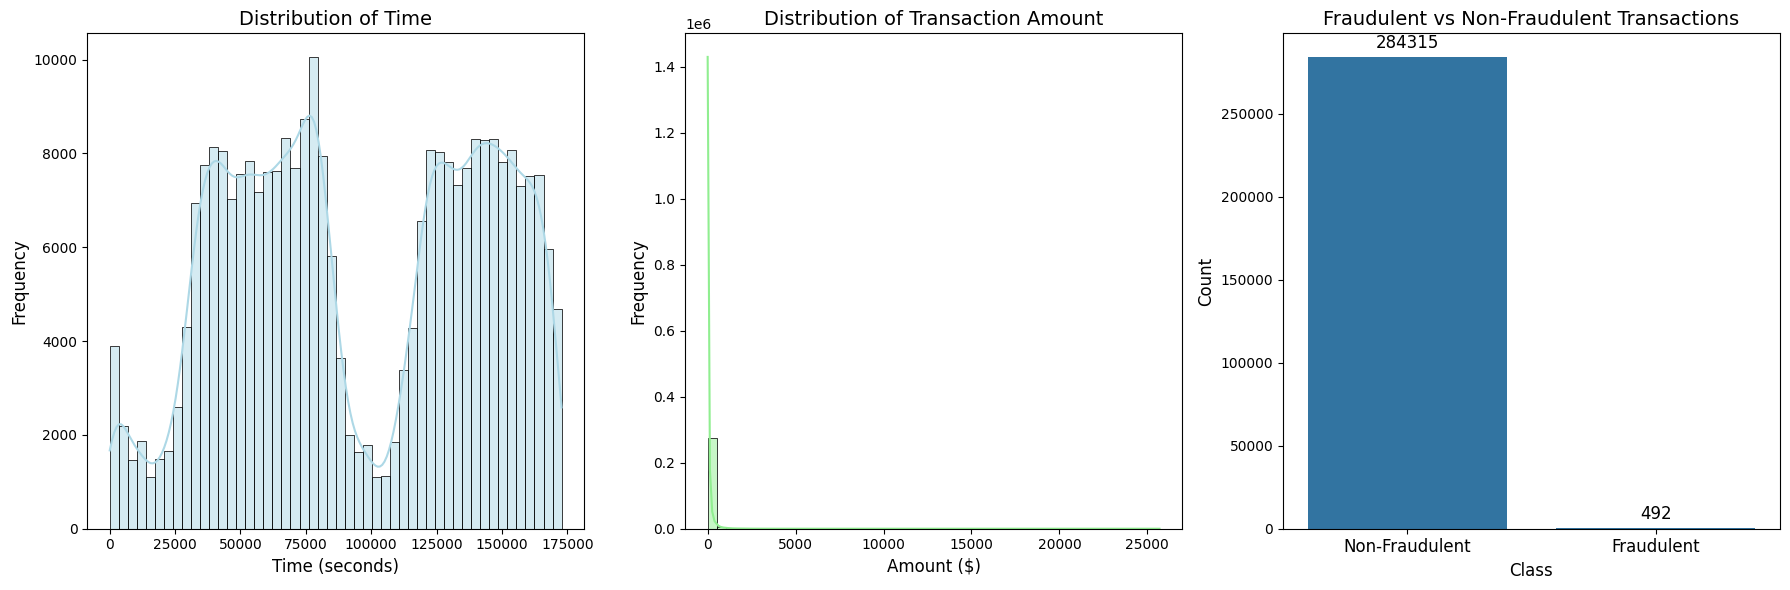

Successfully plotted creditcard_data distributions.

Plotting relationships in fraud_data...
Plotting Purchase Value vs Age...
Plotting Purchase Value vs Source...
Plotting Age vs Source...
Plotting Age vs Browser...
Plotting Fraud Distribution across Age...
Plotting Purchase Time vs Class...


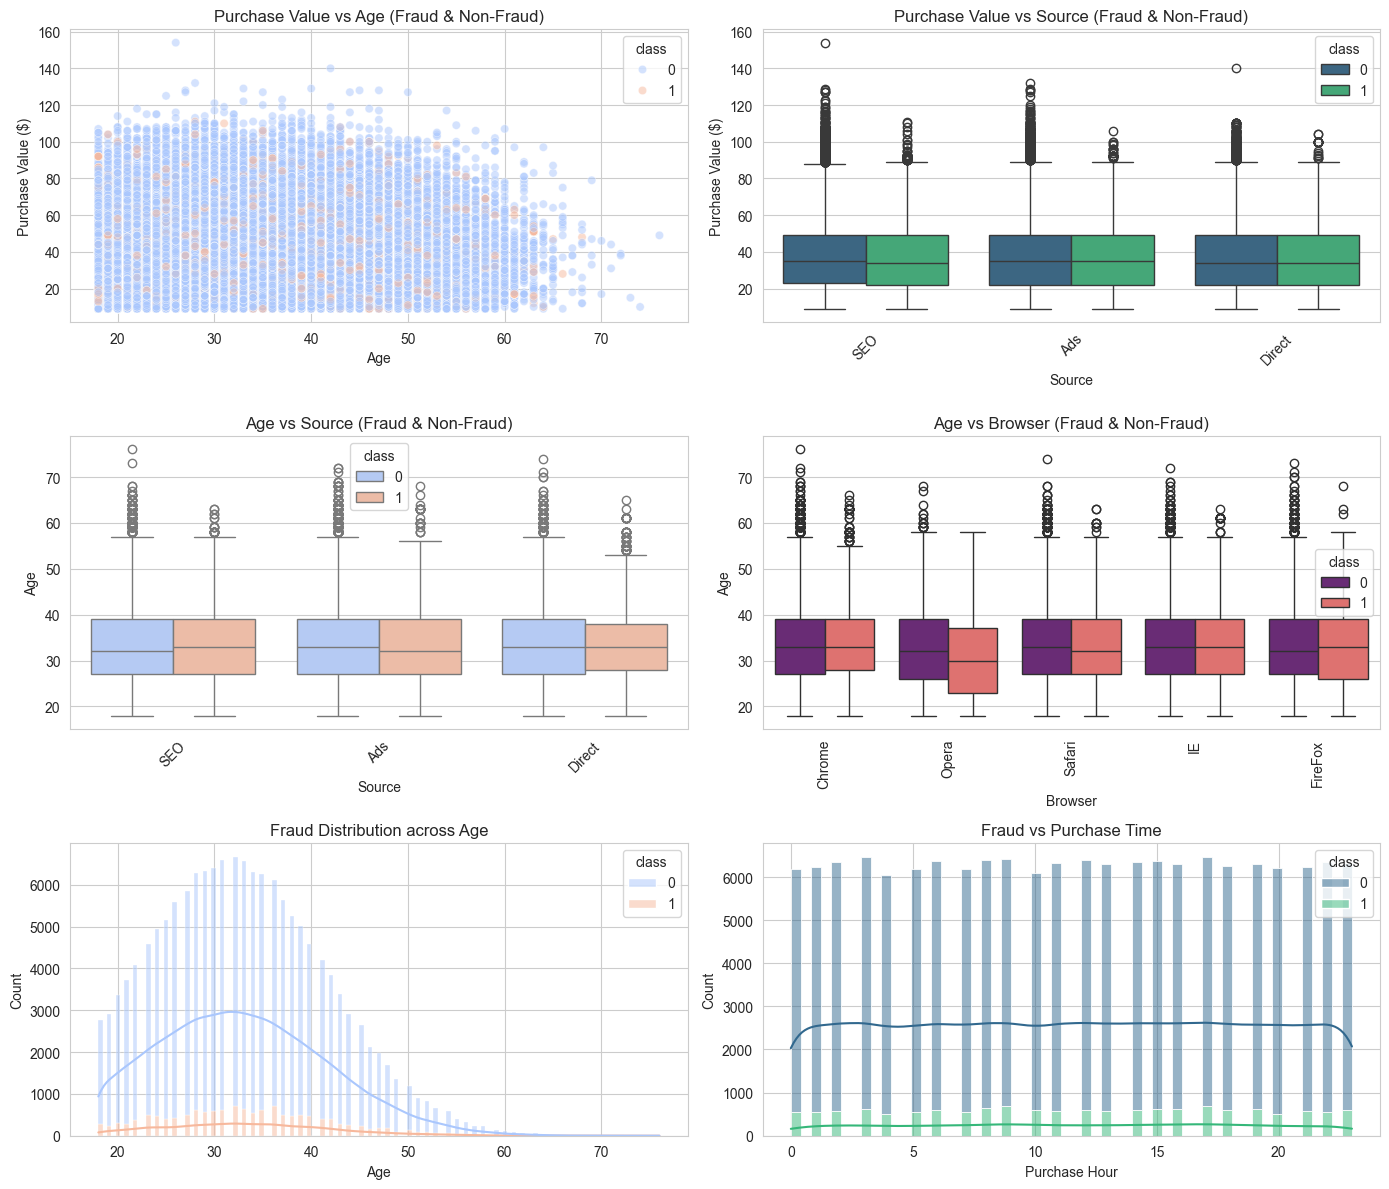

Successfully plotted fraud_data relationships.

Performing correlation analysis...
Plotting Fraud Data heatmap and scatter plot...


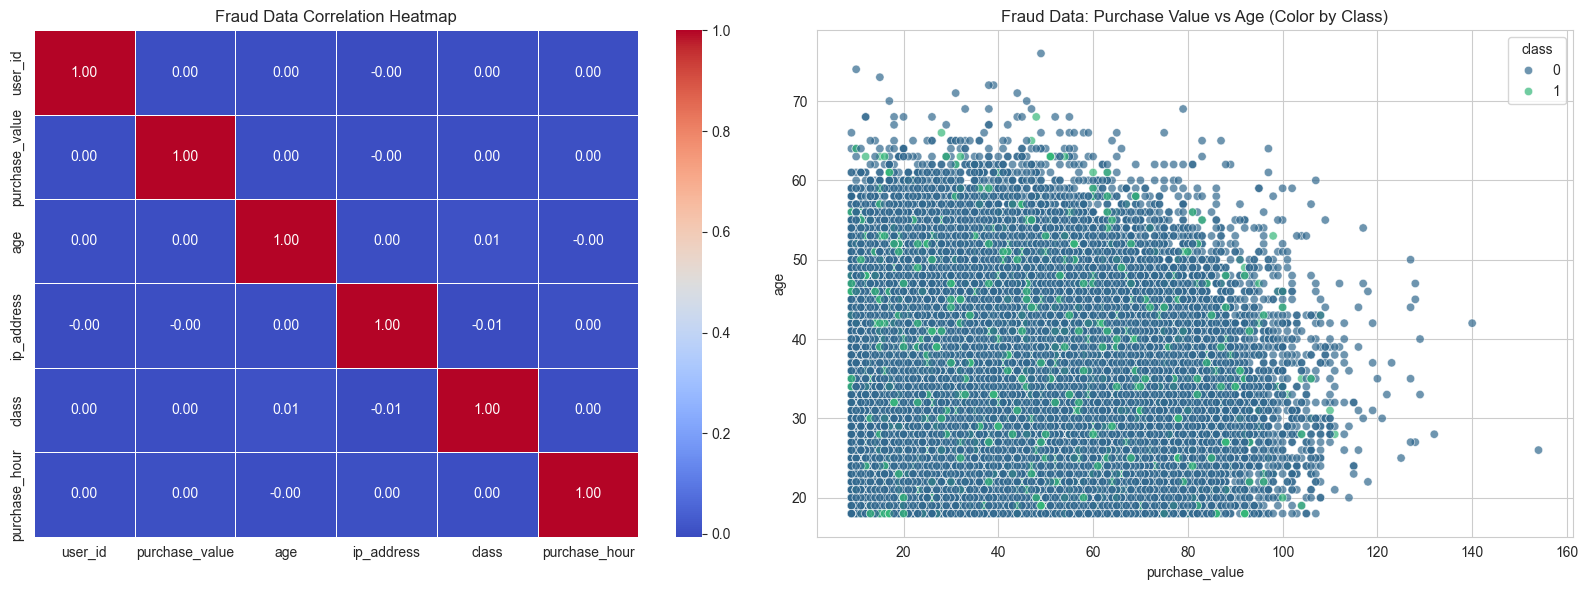

Plotting Credit Card Data heatmap...


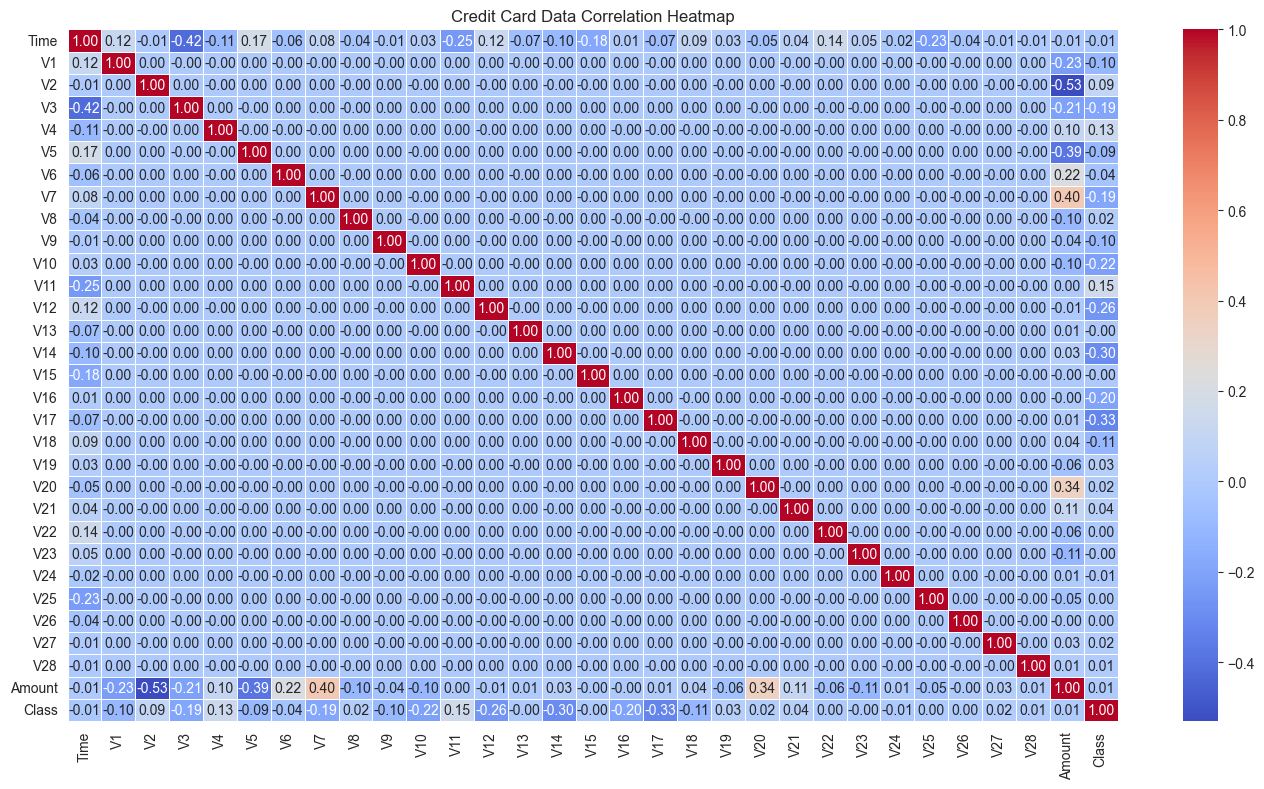

Successfully performed correlation analysis.

Mapping IP addresses to countries...
Successfully mapped IP addresses to countries.

Saving processed data to E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data_Merged.csv...
Data successfully saved to E:\DS+ML\AIM3\Week-8-9\Data\Fraud_Data_Merged.csv.

Exploratory data analysis (EDA) completed.


In [9]:
perform_eda(fraud_data, creditcard_data, ip_to_country, output_path)

In [10]:
# Save the updated data
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_hour,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,2,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,18,Unknown
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,13,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,18,United States


## Feature Engineering 

#### 1. Transaction Frequency and Velocity
#### 2. Time-based feature
#### 3. Normalization and Scaling 
#### 4. Encode Categorical Features

In [11]:
feature_engineering(fraud_data, output_future_engineered)

Starting feature engineering...
Calculating transaction frequency per user...
Converting 'purchase_time' to datetime format...
Calculating transaction velocity...
Extracting time-based features (hour_of_day, day_of_week)...
Applying MinMax scaling...
Applying Standard scaling to 'age' column...
Converting datetime columns to timestamps...
Performing one-hot encoding on categorical columns...
Applying label encoding to 'sex' column...
Converting boolean columns to integers...
Saving processed data to E:\DS+ML\AIM3\Week-8-9\Data\Future_Eng_fraud_Data.csv...
Feature engineering complete!


In [4]:
feature_engineered_data=pd.read_csv(output_future_engineered)

In [5]:
feature_engineered_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,purchase_hour,...,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uzbekistan,country_Viet Nam,country_Virgin Islands (U.S.),country_Zambia
0,22058,1424818549,1429325231,0.172414,QVPSPJUOCKZAR,1,0.679914,732758368,0,2,...,0,0,0,0,0,0,0,0,0,0
1,333320,1433709590,1433727534,0.048276,EOGFQPIZPYXFZ,0,2.304476,350311387,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1359,1420138364,1420138365,0.041379,YSSKYOSJHPPLJ,1,2.304476,-2147483648,1,18,...,0,0,0,0,0,1,0,0,0,0
3,150084,1430255605,1430747690,0.241379,ATGTXKYKUDUQN,1,0.911994,-2147483648,0,13,...,0,0,0,0,0,1,0,0,0,0
4,221365,1437462592,1441824053,0.206897,NAUITBZFJKHWW,1,1.376155,415583117,0,18,...,0,0,0,0,1,0,0,0,0,0
